In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # uniformly distributed between (-3, +3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

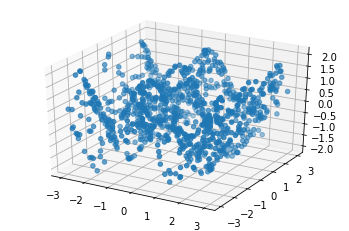

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
  tf.keras.layers.Dense(1)
])

In [7]:
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9578
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9169
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9049
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8971
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8321
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7949
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7125
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6486
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5999
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6434
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5617
Epoch 12/100
32/32 [==============================] - 0s 984us/step - loss: 0.5496
Epoch 13/100
32/32 [===============

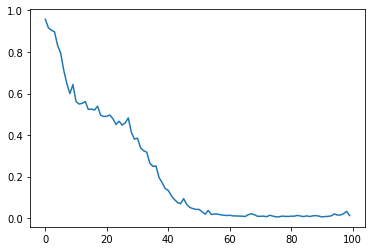

In [8]:
plt.plot(r.history['loss'], label='loss')

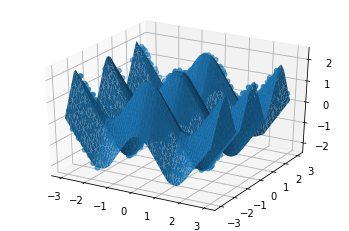

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()